<a href="https://colab.research.google.com/github/TerriblePepito/TerriblePepitostest/blob/main/tradestypesdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
import pandas as pd

# Ouvrir la boîte de dialogue pour télécharger le fichier
uploaded = files.upload()

# Lire le fichier CSV téléchargé dans un DataFrame
for filename in uploaded.keys():
    df = pd.read_csv('tradingjan.csv',delimiter=';', on_bad_lines='warn',encoding='latin-1')  # Importer le fichier CSV
    print(df.head())  # Afficher les premières lignes du DataFrame

Saving tradingjan.csv to tradingjan (1).csv
  Instrument  Volume        Date   P/P
0     CUCUSD    -400  2024-12-30  4,78
1     XAGUSD     -40  2025-01-06  7,26
2     EURUSD   -8000  2024-12-31  4,27
3     CUCUSD    -400  2024-12-31  3,76
4     XAGUSD     -40  2024-12-30  4,02


In [5]:
#subgroup of EUR/USD
dfvalue=df.loc[df['Instrument']=='EURUSD',['P/P','Volume']]

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [4]:
df['P/P'] = df['P/P'].str.replace(',', '.').astype(float)


In [6]:
print(df.dtypes)

Instrument            object
Volume                 int64
Date          datetime64[ns]
P/P                  float64
dtype: object


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-25-ee1bbf4e0e08>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Instrument', data=df, palette='pastel')


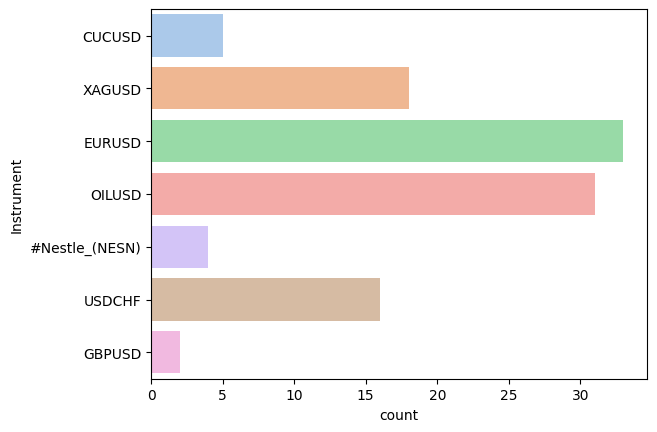

In [ ]:
sns.countplot(y='Instrument', data=df, palette='pastel')
plt.show()

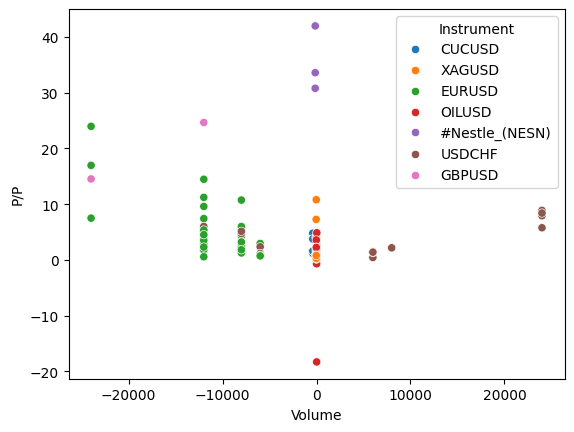

In [ ]:
sns.scatterplot(x='Volume', y='P/P', data=df, hue="Instrument")
plt.show()

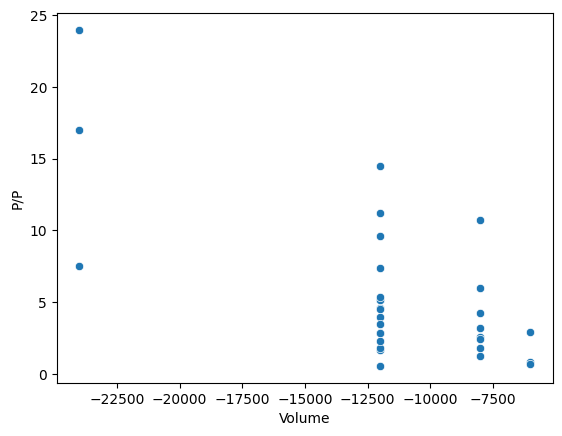

In [ ]:
sns.scatterplot(x='Volume', y='P/P', data=dfvalue, hue=)
plt.show()

<ipython-input-10-dd5a19a68c25>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x="Date", y="P/P", shade=True)


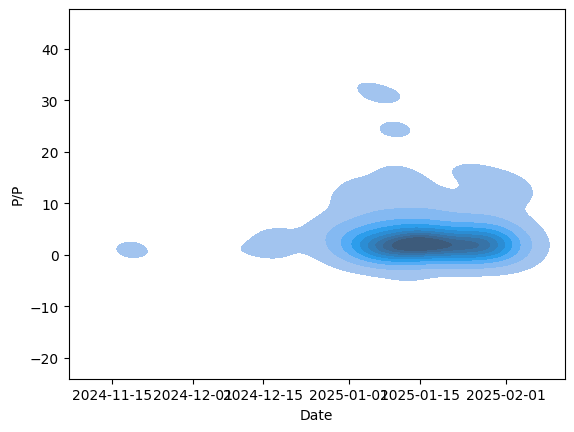

In [10]:
sns.kdeplot(data=df, x="Date", y="P/P", shade=True)
plt.show()

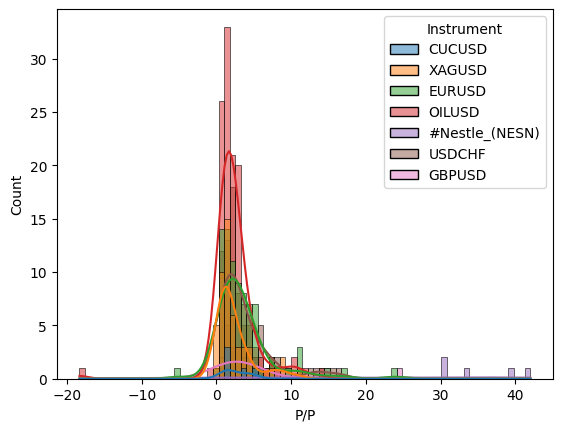

In [12]:
sns.histplot(data=df, x="P/P", kde=True, hue="Instrument")
plt.show()